# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Input

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## Drop 
```python
['id', 'customer_id', 'month', 'name', 'ssn']
```

In [ ]:
df.columns = df.columns.str.lower()
df = df.drop(['id', 'customer_id', 'month', 'name', 'ssn'], axis=1)
df.head(2)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


# EDA

## check the data type of each column

In [ ]:
# df.info()

## create a dataframe with string columns

In [ ]:
string_columns = df.dtypes[df.dtypes == object].index
df_str = df[string_columns].drop('credit_score', axis=1)
df_str.head()

,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
0,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Small_value_payments
1,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Large_value_payments
2,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Medium_value_payments
3,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Small_value_payments
4,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Medium_value_payments


## create a dataframe with numerical columns

In [ ]:
numerical_columns = df.dtypes[df.dtypes != object].index
df_num = df[numerical_columns]
df_num.head()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231


## examine the numerical columns

In [ ]:
df_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## calculate correlation for numerical columns

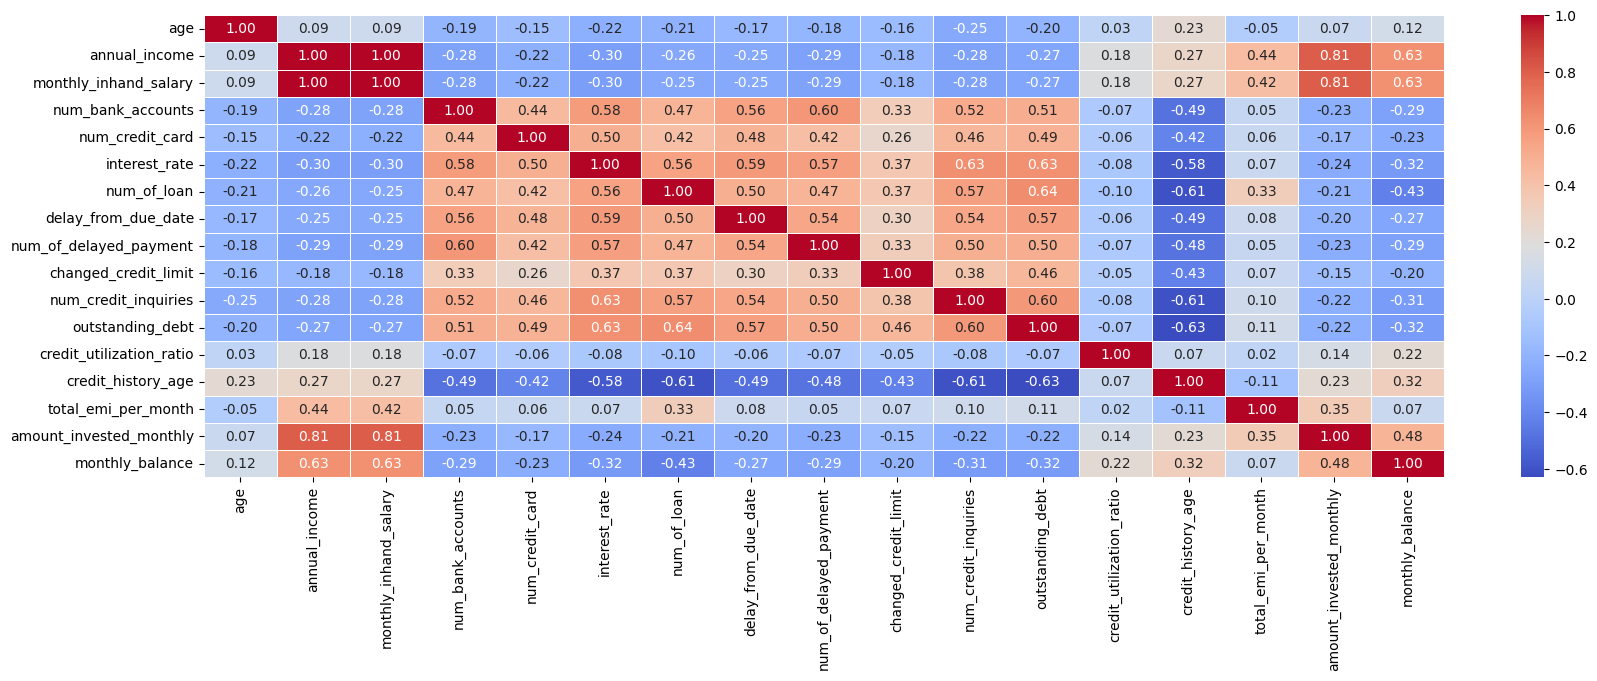

In [ ]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

## Drop `annual_income` or `monthly_inhand_salary` since they are perfectly correlated with each other

In [ ]:
df_num = df_num.drop('annual_income', axis=1)

# Features Distributions
create a boxplot to check for outliers

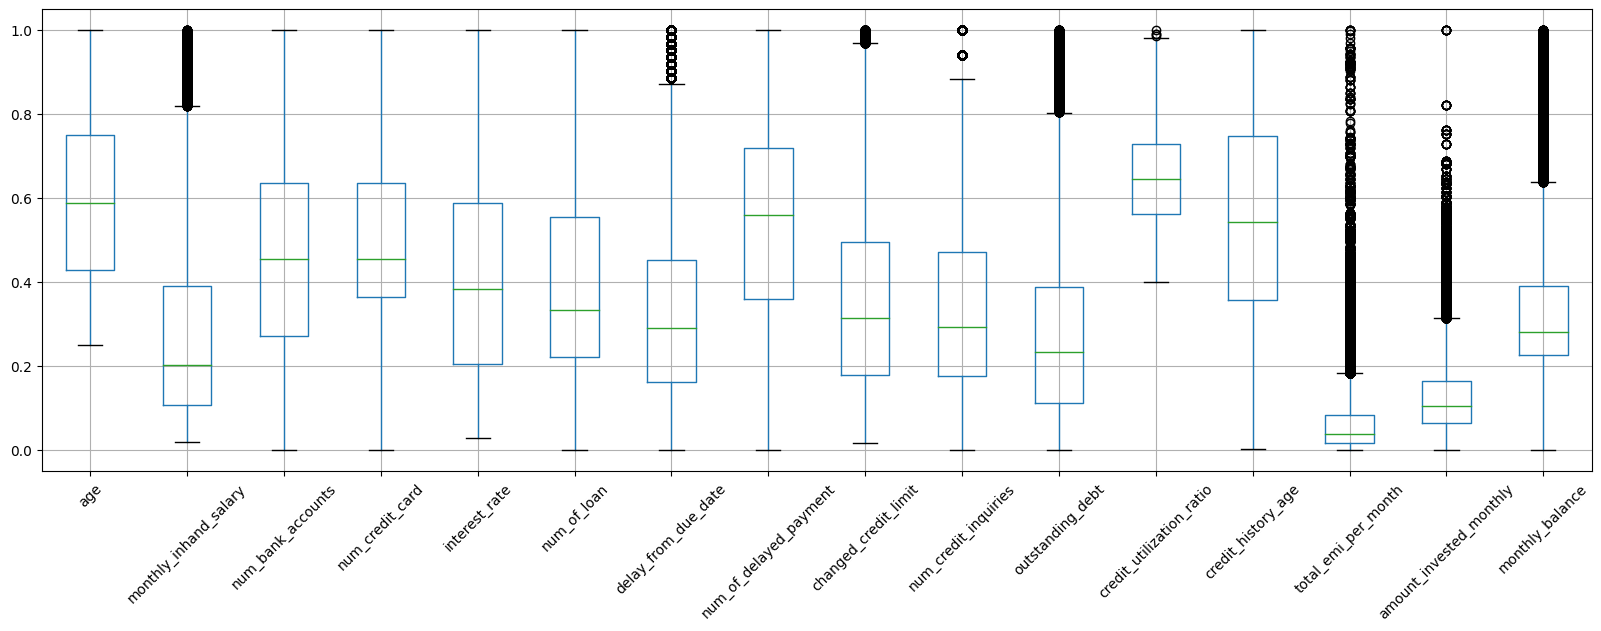

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
ax = (df_num/df_num.max()).boxplot()
plt.xticks(rotation=45)
plt.show()

## visualize the distribution of each variable

In [ ]:
# # Create subplots for each set of 5 columns in each row
# num_plots = len(input_df.columns)
# num_rows = len(input_df.columns) // 5 + 1  # Number of rows needed

# fig, axes = plt.subplots(num_rows, 5, figsize=(15, 12))

# for i, col in enumerate(input_df.columns):
#     row_num = i // 5
#     col_num = i % 5
#     ax = axes[row_num, col_num]
#     sns.histplot(df[col], ax=ax, kde=True)
#     ax.set_title(f'Distribution - {col}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
# # Remove empty subplots
# for i in range(num_plots, num_rows * 5):
#     fig.delaxes(axes.flatten()[i])

# plt.tight_layout()
# plt.show()

## calculate the average of each column for each label in the target variable

In [ ]:
grouped = df.groupby('credit_score').mean(numeric_only=True)
grouped

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
credit_score,,,,,,,,,,,,,,,,,
Good,36.402625,65203.672105,5399.919696,3.440263,4.143258,7.662329,2.202154,10.958997,8.564842,7.249857,3.298631,801.256324,32.686107,284.765650,121.691019,67.417611,456.691556
Poor,31.194565,40584.515325,3380.560657,6.526726,6.625147,20.187116,4.755742,29.728809,15.809883,11.116281,8.179599,2081.473157,31.986146,170.061797,111.198326,47.033019,339.212601
Standard,33.438673,50987.164840,4239.436890,5.383966,5.404427,13.751420,3.312164,19.759431,13.543518,11.197803,5.337665,1278.419552,32.313820,227.814195,101.099865,55.371927,400.409496


## create barplots for some columns to see how they can help with classifying the data

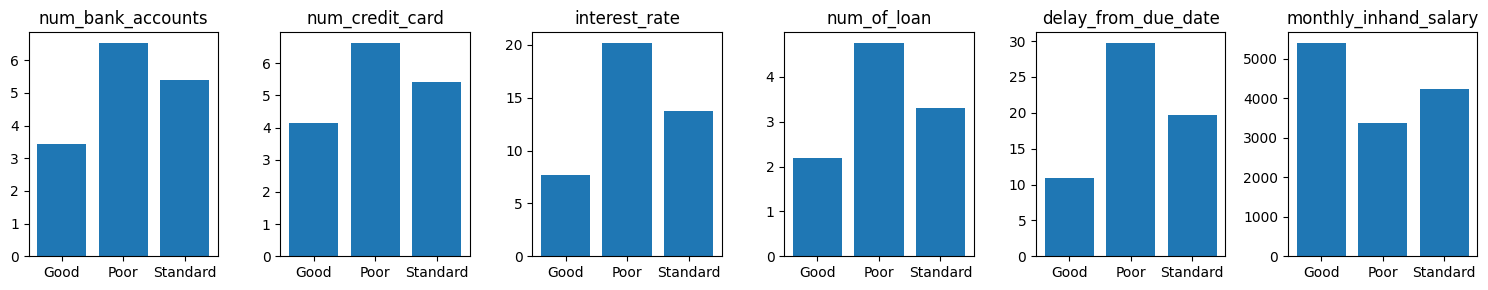

In [ ]:
columns_for_bar_plot = ['num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'monthly_inhand_salary']

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, column in enumerate(columns_for_bar_plot):
    ax = axes[i]
    ax.bar(grouped.index, grouped[column])
    ax.set_title(f'{column}')
    
plt.tight_layout()
plt.show()

## process the `type_of_loan` column to expand it and create a column for each unique value in it

In [ ]:
def process_type_of_loan(df):
    
    # Split the strings and create a set of unique items
    unique_items = set()
    
    for item_list in df['type_of_loan']:
        items = item_list.split(',')
        unique_items.update(items)

    # Create a dictionary to hold binary indicators for each item
    indicators = {}
    for item in unique_items:
        indicators[item] = df['type_of_loan'].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_df = pd.DataFrame(indicators)
    
    return result_df

In [ ]:
df_str = pd.concat([df_str, process_type_of_loan(df)], axis=1).drop('type_of_loan', axis=1)
df_str.head()

,occupation,credit_mix,payment_of_min_amount,payment_behaviour,debt consolidation loan,credit-builder loan,home equity loan,student loan,mortgage loan,auto loan,personal loan,not specified,No Data,payday loan
0,Scientist,Good,No,High_spent_Small_value_payments,0,1,1,0,0,1,1,0,0,0
1,Scientist,Good,No,Low_spent_Large_value_payments,0,1,1,0,0,1,1,0,0,0
2,Scientist,Good,No,Low_spent_Medium_value_payments,0,1,1,0,0,1,1,0,0,0
3,Scientist,Good,No,Low_spent_Small_value_payments,0,1,1,0,0,1,1,0,0,0
4,Scientist,Good,No,High_spent_Medium_value_payments,0,1,1,0,0,1,1,0,0,0


In [ ]:
df_str.nunique()

occupation                 15
credit_mix                  3
payment_of_min_amount       3
payment_behaviour           6
debt consolidation loan     2
credit-builder loan         2
home equity loan            2
student loan                2
mortgage loan               2
auto loan                   2
personal loan               2
not specified               2
No Data                     2
payday loan                 2
dtype: int64

## create One-Hot_Encoded features from categorical features with `pd.get_dummies`

In [ ]:
df_str = df_str.drop('occupation', axis=1)
df_str = pd.get_dummies(df_str, drop_first=False)
df_str.head()

,debt consolidation loan,credit-builder loan,home equity loan,student loan,mortgage loan,auto loan,personal loan,not specified,No Data,payday loan,credit_mix_Bad,credit_mix_Good,credit_mix_Standard,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,0,1,1,0,0,1,1,0,0,0,False,True,False,False,True,False,False,False,True,False,False,False
1,0,1,1,0,0,1,1,0,0,0,False,True,False,False,True,False,False,False,False,True,False,False
2,0,1,1,0,0,1,1,0,0,0,False,True,False,False,True,False,False,False,False,False,True,False
3,0,1,1,0,0,1,1,0,0,0,False,True,False,False,True,False,False,False,False,False,False,True
4,0,1,1,0,0,1,1,0,0,0,False,True,False,False,True,False,False,True,False,False,False,False


# Decision Tree Model

## Using only numerical columns

define the input and the outoput variables

In [ ]:
x = df_num
y = df['credit_score']

split the data into `train` and `test` sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

define and train the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

evaluate the model on bith training and testing sets

In [ ]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.73925)

check feature importance

In [ ]:
pd.DataFrame(dt.feature_importances_, index=x.columns).T.sort_values(by=0, axis=1, ascending=False)

,outstanding_debt,credit_history_age,interest_rate,monthly_balance,credit_utilization_ratio,changed_credit_limit,num_credit_card,num_of_delayed_payment,delay_from_due_date,monthly_inhand_salary,total_emi_per_month,amount_invested_monthly,age,num_credit_inquiries,num_bank_accounts,num_of_loan
0,0.168511,0.11226,0.082742,0.077307,0.075544,0.065348,0.059733,0.056037,0.0531,0.046444,0.044965,0.044645,0.040007,0.030709,0.029588,0.013062


## Using Categorical Columns

In [ ]:
x = df_str
y = df['credit_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

dt = DT()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(0.6978, 0.6155)

In [ ]:
pd.DataFrame(dt.feature_importances_, index=x.columns).T.sort_values(by=0, axis=1, ascending=False)

,credit_mix_Good,credit_mix_Bad,mortgage loan,not specified,payday loan,personal loan,credit-builder loan,home equity loan,payment_of_min_amount_No,student loan,auto loan,payment_of_min_amount_NM,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_Low_spent_Medium_value_payments,debt consolidation loan,payment_behaviour_High_spent_Small_value_payments,payment_of_min_amount_Yes,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_Low_spent_Small_value_payments,No Data,credit_mix_Standard
0,0.296464,0.196193,0.041608,0.038952,0.038178,0.036208,0.03485,0.031382,0.029604,0.026845,0.024656,0.024577,0.023767,0.023407,0.021682,0.021519,0.019995,0.019711,0.019267,0.018255,0.012879,0.0


## Using all columns

In [ ]:
x = pd.concat([df_str, df_num], axis=1)
y = df['credit_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

dt = DT()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.7469)

In [ ]:
y_pred = dt.predict(x_test)

## More Metrics

In [ ]:
from sklearn.metrics import *

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7469
Precision: 0.734430548849196
Recall: 0.7337525256701865


In [ ]:
pd.DataFrame(dt.feature_importances_, index=x.columns).T.sort_values(by=0, axis=1, ascending=False)

,outstanding_debt,credit_mix_Standard,credit_history_age,monthly_balance,credit_utilization_ratio,delay_from_due_date,changed_credit_limit,interest_rate,monthly_inhand_salary,age,amount_invested_monthly,total_emi_per_month,num_of_delayed_payment,num_credit_card,num_credit_inquiries,num_bank_accounts,num_of_loan,payment_behaviour_Low_spent_Small_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,personal loan,credit_mix_Good,home equity loan,auto loan,student loan,credit-builder loan,mortgage loan,debt consolidation loan,payday loan,not specified,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,No Data,credit_mix_Bad
0,0.164132,0.11569,0.086037,0.06269,0.062215,0.056439,0.052893,0.048726,0.041609,0.039494,0.038912,0.035341,0.0349,0.026724,0.022921,0.016505,0.010421,0.007366,0.006479,0.006461,0.005592,0.005082,0.00494,0.00469,0.004406,0.004282,0.004244,0.003876,0.00374,0.003695,0.003605,0.003577,0.003576,0.003513,0.002291,0.002054,0.000634,0.000246


# KNN Model

[Sci-Kit Learn Documentation](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors)

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. In KNN:

Classification: KNN classifies data points by identifying the majority class among their k-nearest neighbors in the feature space. It assigns the class label that is most common among the k nearest data points.

Regression: For regression tasks, KNN predicts the value of a data point by averaging or weighting the values of its k-nearest neighbors. The predicted value is based on the average or weighted value of these neighbors.

### Key Characteristics:

**Instance-Based**: KNN is instance-based, meaning it stores the entire training dataset and makes predictions by comparing new data points to the existing data points. It doesn't build an explicit model.

**Distance Metric**: The choice of a distance metric (e.g., Euclidean distance) determines how KNN measures similarity between data points.

**Hyperparameter**: The value of k, the number of nearest neighbors to consider, is a critical hyperparameter. It needs to be chosen carefully, as it can impact model performance.

**Simple and Versatile**: KNN is easy to understand and implement, making it a good choice for quick and simple classification or regression tasks. However, it may not perform as well as more sophisticated algorithms on complex datasets.



In [ ]:
# x = pd.concat([df_str, df_num], axis=1)
x = pd.concat([df_num], axis=1)
y = df['credit_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(x_train, y_train)

CPU times: user 136 ms, sys: 36 µs, total: 136 ms
Wall time: 135 ms


KNeighborsClassifier()

In [ ]:
%%time
knn.score(x_train, y_train)

CPU times: user 54.8 s, sys: 40.7 ms, total: 54.8 s
Wall time: 17.2 s


0.8213

## More Metrics

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.72415
Precision: 0.6990035306668408
Recall: 0.6993998446071639


# Feature Scaling for KNN

## Min-Max Scaling

Min-Max scaling (also known as normalization) is a data preprocessing technique that scales features to a specific range, typically [0, 1] or [-1, 1]. It transforms the data to ensure that all feature values lie within the desired range.

The formula for Min-Max scaling is as follows:

**X_scaled = (X - X_min) / (X_max - X_min)**


- `X_scaled`: The scaled value of the feature.
- `X`: The original value of the feature.
- `X_min`: The minimum value of the feature in the dataset.
- `X_max`: The maximum value of the feature in the dataset.

Min-Max scaling is useful when you want to preserve the relationships between feature values but ensure they all fall within a common range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

standard_scaler = StandardScaler()

x_train_standard = standard_scaler.fit_transform(x_train)
x_test_standard = standard_scaler.transform(x_test)

knn_standard = KNN()
knn_standard.fit(x_train_standard, y_train)
y_pred_standard = knn_standard.predict(x_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
accuracy_standard

0.7543

## Standardization

Standardization (or z-score scaling) is another data preprocessing technique used to scale features. It transforms the data to have a mean (average) of 0 and a standard deviation of 1.

The formula for standardization is as follows:

**X_standardized = (X - mean(X)) / std(X)**

- `X_standardized`: The standardized value of the feature.
- `X`: The original value of the feature.
- `mean(X)`: The mean (average) value of the feature in the dataset.
- `std(X)`: The standard deviation of the feature in the dataset.

Standardization is useful when you want to center the data around the mean and express feature values in terms of their deviation from the mean. It's particularly valuable when working with algorithms that assume or perform better when the data is normally distributed.

Both Min-Max scaling and standardization are common preprocessing techniques, and the choice between them depends on your specific use case and the assumptions of the machine learning algorithm you are using.




In [ ]:
min_max_scaler = MinMaxScaler()
x_train_min_max = min_max_scaler.fit_transform(x_train)
x_test_min_max = min_max_scaler.transform(x_test)

knn_min_max = KNN()
knn_min_max.fit(x_train_min_max, y_train)
y_pred_min_max = knn_min_max.predict(x_test_min_max)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
accuracy_min_max

0.7728